# Data Description.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ridam\Documents\telecom_customer_churn.csv(n).csv")

In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer_Status,Churn Category,Churn_Reason
0,1635-FJFCC,Female,46,No,0,Acton,93510,34.501452,-118.207862,0,...,Credit Card,44.05,202.15,0.0,0,54.95,257.10,Stayed,NaN,NaN
1,3312-ZWLGF,Male,69,Yes,0,Acton,93510,34.501452,-118.207862,0,...,Bank Withdrawal,79.30,2414.55,0.0,0,305.95,2720.50,Stayed,NaN,NaN
2,6143-JQKEA,Male,34,No,0,Adelanto,92301,34.667815,-117.536183,0,...,Credit Card,45.80,436.20,0.0,0,154.50,590.70,Stayed,NaN,NaN
3,8993-IZEUX,Male,54,No,0,Adin,96006,41.171578,-120.913161,0,...,Bank Withdrawal,69.15,488.65,0.0,0,147.84,636.49,Stayed,NaN,NaN
4,6990-YNRIO,Male,53,Yes,0,Agoura Hills,91301,34.129058,-118.759788,0,...,Bank Withdrawal,108.65,6937.95,0.0,0,2722.20,9660.15,Churned,Attitude,Attitude of support person


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   int32  
 1   Gender                             7043 non-null   int32  
 2   Age                                7043 non-null   float64
 3   Married                            7043 non-null   float64
 4   Number of Dependents               7043 non-null   float64
 5   City                               7043 non-null   int32  
 6   Zip Code                           7043 non-null   float64
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   float64
 11  Offer                              7043 non-null   float

# Preprocessing

In [4]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
PhoneService                            0
Avg Monthly Long Distance Charges     682
Multiple_Lines                        682
Internet_Service                        0
Internet _Type                       1526
Avg Monthly GB Download              1526
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium _Tech _Support               1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
columns=df.columns.drop("Churn_Reason")
columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'PhoneService',
       'Avg Monthly Long Distance Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet _Type', 'Avg Monthly GB Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium _Tech _Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer_Status', 'Churn Category'],
      dtype='object')

In [6]:
principal_locality={}
for col in columns:
    principal_locality[col]=df[col].mode()[0]
    df[col].fillna(principal_locality[col],inplace=True)

In [7]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
PhoneService                            0
Avg Monthly Long Distance Charges       0
Multiple_Lines                          0
Internet_Service                        0
Internet _Type                          0
Avg Monthly GB Download                 0
Online_Security                         0
Online_Backup                           0
Device_Protection_Plan                  0
Premium _Tech _Support                  0
Streaming TV                            0
Streaming Movies                  

# Encoding

In [8]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)

In [9]:
df_cat

,Customer ID,Gender,Married,City,Offer,PhoneService,Multiple_Lines,Internet_Service,Internet _Type,Online_Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer_Status,Churn Category,Churn_Reason
0,1635-FJFCC,Female,No,Acton,None,Yes,No,Yes,DSL,No,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Stayed,Competitor,NaN
1,3312-ZWLGF,Male,Yes,Acton,None,Yes,Yes,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,NaN
2,6143-JQKEA,Male,No,Adelanto,None,Yes,No,Yes,Cable,No,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Stayed,Competitor,NaN
3,8993-IZEUX,Male,No,Adin,None,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,Stayed,Competitor,NaN
4,6990-YNRIO,Male,Yes,Agoura Hills,None,Yes,Yes,Yes,Fiber Optic,Yes,...,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,Churned,Attitude,Attitude of support person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7389-KBFIT,Female,Yes,Big Pine,Offer E,No,No,Yes,DSL,No,...,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,Joined,Competitor,NaN
7039,9505-SQFSW,Female,Yes,Tehachapi,Offer E,No,No,Yes,Cable,No,...,No,Yes,Yes,Yes,Month-to-Month,No,Credit Card,Joined,Competitor,NaN
7040,7816-VGHTO,Female,Yes,Rio Oso,Offer E,No,No,Yes,Cable,No,...,No,No,No,No,Two Year,No,Credit Card,Stayed,Competitor,NaN
7041,0274-JKUJR,Male,Yes,Los Angeles,Offer E,No,No,Yes,Cable,Yes,...,Yes,Yes,Yes,Yes,Month-to-Month,No,Credit Card,Stayed,Competitor,NaN


In [10]:
cat_columns = df.select_dtypes(include=["object"]).columns.drop('Churn_Reason')

In [11]:
df_encoded=pd.get_dummies(df,columns=cat_columns)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder=LabelEncoder()

In [14]:
for col in cat_columns:
    df[col]=label_encoder.fit_transform(df[col])

In [15]:
df_encoded.dtypes

Age                                 int64
Number of Dependents                int64
Zip Code                            int64
Latitude                          float64
Longitude                         float64
                                   ...   
Churn Category_Attitude             uint8
Churn Category_Competitor           uint8
Churn Category_Dissatisfaction      uint8
Churn Category_Other                uint8
Churn Category_Price                uint8
Length: 8216, dtype: object

In [16]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer_Status,Churn Category,Churn_Reason
0,1118,0,46,0,0,1,93510,34.501452,-118.207862,0,...,1,44.05,202.15,0.0,0,54.95,257.10,2,1,NaN
1,2312,1,69,1,0,1,93510,34.501452,-118.207862,0,...,0,79.30,2414.55,0.0,0,305.95,2720.50,2,1,NaN
2,4359,1,34,0,0,2,92301,34.667815,-117.536183,0,...,1,45.80,436.20,0.0,0,154.50,590.70,2,1,NaN
3,6354,1,54,0,0,3,96006,41.171578,-120.913161,0,...,0,69.15,488.65,0.0,0,147.84,636.49,2,1,NaN
4,4967,1,53,1,0,4,91301,34.129058,-118.759788,0,...,0,108.65,6937.95,0.0,0,2722.20,9660.15,0,0,Attitude of support person


# Analysis

In [17]:
Married=df["Married"].tolist()
m=len(Married)
print(m)
Customer_Status=df["Customer_Status"].tolist()
n=len(Customer_Status)
print(n)

7043
7043


In [18]:
count_m=0
count_c=0
for i in range(len(Married)):
    if(Married[i]==1):
        count_m= count_m+1
    if(Customer_Status[i]==0):
        count_c= count_c+1
print(count_m)
print(count_c)        

3402
1869


In [19]:
count_curned_married=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==0):
            count_curned_married=count_curned_married+1
        
print("No.of married customer that churned:", count_curned_married)       

No.of married customer that churned: 669


In [20]:
count_curned_unmarried=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==0):
            count_curned_unmarried=count_curned_unmarried+1
        
print("No.of unmarried customer that churned:",count_curned_unmarried)       

No.of unmarried customer that churned: 1200


In [21]:
count_stayed_unmarried=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==2):
            count_stayed_unmarried=count_stayed_unmarried+1
        
print("No.of unmarried customer that stayed:",count_stayed_unmarried)       

No.of unmarried customer that stayed: 2071


In [22]:
count_stayed_married=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==2):
            count_stayed_married=count_stayed_married+1
        
print("No.of married customer that stayed:",count_stayed_married)       

No.of married customer that stayed: 2649


In [23]:
count_joined_married=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==1):
            count_joined_married=count_joined_married+1
        
print("No.of married customer that joined:",count_joined_married)       

No.of married customer that joined: 84


In [24]:
count_joined_unmarried=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==1):
            count_joined_unmarried=count_joined_unmarried+1
        
print("No.of unmarried customer that joined:",count_joined_unmarried)       

No.of unmarried customer that joined: 370


In [25]:
Multiple_Lines=df["Multiple_Lines"].tolist()
m=len(Multiple_Lines)
print(m)

7043


In [26]:
count_curned=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==1 and Customer_Status[i]==0):
            count_curned=count_curned+1
        
print("No.of customers using Multiple_Lines that churned:", count_curned)       

No.of customers using Multiple_Lines that churned: 850


In [27]:
count_curned1=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==0 and Customer_Status[i]==0):
            count_curned1=count_curned1+1
        
print("No.of customers not using Multiple_Lines that churned:", count_curned1)       

No.of customers not using Multiple_Lines that churned: 1019


In [28]:
count_stayed1=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==0 and Customer_Status[i]==2):
            count_stayed1=count_stayed1+1
        
print("No.of customers not using Multiple_Lines that stayed:", count_stayed1)       

No.of customers not using Multiple_Lines that stayed: 2644


In [29]:
count_stayed=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==1 and Customer_Status[i]==2):
            count_stayed=count_stayed+1
        
print("No.of customers using Multiple_Lines that stayed:", count_stayed)       

No.of customers using Multiple_Lines that stayed: 2076


In [30]:
count_joined=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==1 and Customer_Status[i]==1):
            count_joined=count_joined+1
        
print("No.of customers using Multiple_Lines that joined:", count_joined)       

No.of customers using Multiple_Lines that joined: 45


In [31]:
count_joined1=0
for i in range(len(Multiple_Lines)):
    if (Multiple_Lines[i]==0 and Customer_Status[i]==1):
            count_joined1=count_joined1+1
        
print("No.of customers not using Multiple_Lines that joined:", count_joined1)       

No.of customers not using Multiple_Lines that joined: 409


In [32]:
age=df["Age"].tolist()

In [33]:
status=df["Customer_Status"].tolist()

In [34]:
ag1=0
ag2=0
ag3=0
ag4=0

for i in range(len(age)):
    if age[i]<=20 and status[i]==0:
        ag1=ag1+1
    if age[i]>=21 and age[i]<=30 and status[i]==0:
        ag2=ag2+1
    if age[i]>=31 and age[i]<=40 and status[i]==0:
        ag3=ag3+1
    if age[i]<=41and status[i]==0:
        ag4=ag4+1
print(ag1)
print(ag2)
print(ag3)
print(ag4)

48
294
303
679


In [35]:
count_curned1=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==0 and age[i]<=20):
            count_curned1=count_curned1+1
        
print("No.of married customer of age less than 20, that churned:", count_curned1)       

No.of married customer of age less than 20, that churned: 14


In [36]:
count_curned2=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==0 and age[i]>=21 and age[i]<=30):
            count_curned2=count_curned2+1
        
print("No.of married customer of age between 21 to 30 that churned:", count_curned2) 

No.of married customer of age between 21 to 30 that churned: 99


In [37]:
count_curned3=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==0 and age[i]>=31 and age[i]<=40):
            count_curned3=count_curned3+1
        
print("No.of married customer of age between 31 to 40 that churned:", count_curned3) 

No.of married customer of age between 31 to 40 that churned: 106


In [38]:
count_curned4=0
for i in range(len(Married)):
    if (Married[i]==1 and Customer_Status[i]==0 and age[i]>41 ):
            count_curned4=count_curned4+1
        
print("No.of married customer of age above 41, that churned:", count_curned4) 

No.of married customer of age above 41, that churned: 438


In [39]:
count_curned5=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==0 and age[i]<20):
            count_curned5=count_curned5+1
        
print("No.of unmarried customer of age less than 20, that churned:", count_curned5) 

No.of unmarried customer of age less than 20, that churned: 11


In [40]:
count_curned6=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==0 and age[i]>=21 and age[i]<=30):
            count_curned6=count_curned6+1
        
print("No.of unmarried customer of age between 21 to 30, that churned:", count_curned6)

No.of unmarried customer of age between 21 to 30, that churned: 195


In [41]:
count_curned7=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==0 and age[i]>=31 and age[i]<=40):
            count_curned7=count_curned7+1
        
print("No.of unmarried customer of age between 31 to 40, that churned:", count_curned7) 

No.of unmarried customer of age between 31 to 40, that churned: 197


In [42]:
count_curned8=0
for i in range(len(Married)):
    if (Married[i]==0 and Customer_Status[i]==0 and age[i]>41):
            count_curned8=count_curned8+1
        
print("No.of unmarried customer of age above 41, that churned:", count_curned8) 

No.of unmarried customer of age above 41, that churned: 752


# Visualization

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
chruned=0
stayed=0
joined=0
for i in range(len(Customer_Status)):
    if Customer_Status[i]==0:
        chruned=chruned+1
    if Customer_Status[i]==2:
        stayed=stayed+1   
    if Customer_Status[i]==1:
        joined=joined+1
print(chruned)
print(stayed)
print(joined)

1869
4720
454


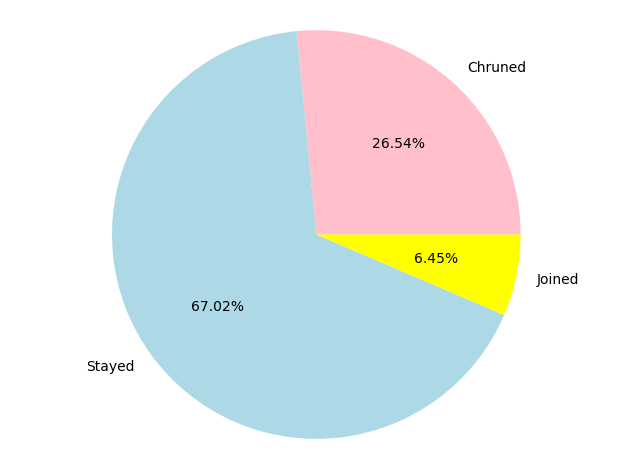

In [45]:
labels=["Chruned","Stayed","Joined"]
counts=[1869,4720,454]
explode=(0,0,0)
color=['pink','lightblue','yellow']
fig1,ax1=plt.subplots()
ax1.pie(counts,explode=explode,labels=labels,colors=color,autopct='%1.2f%%')
ax1.axis('equal')
plt.tight_layout()
plt.show()

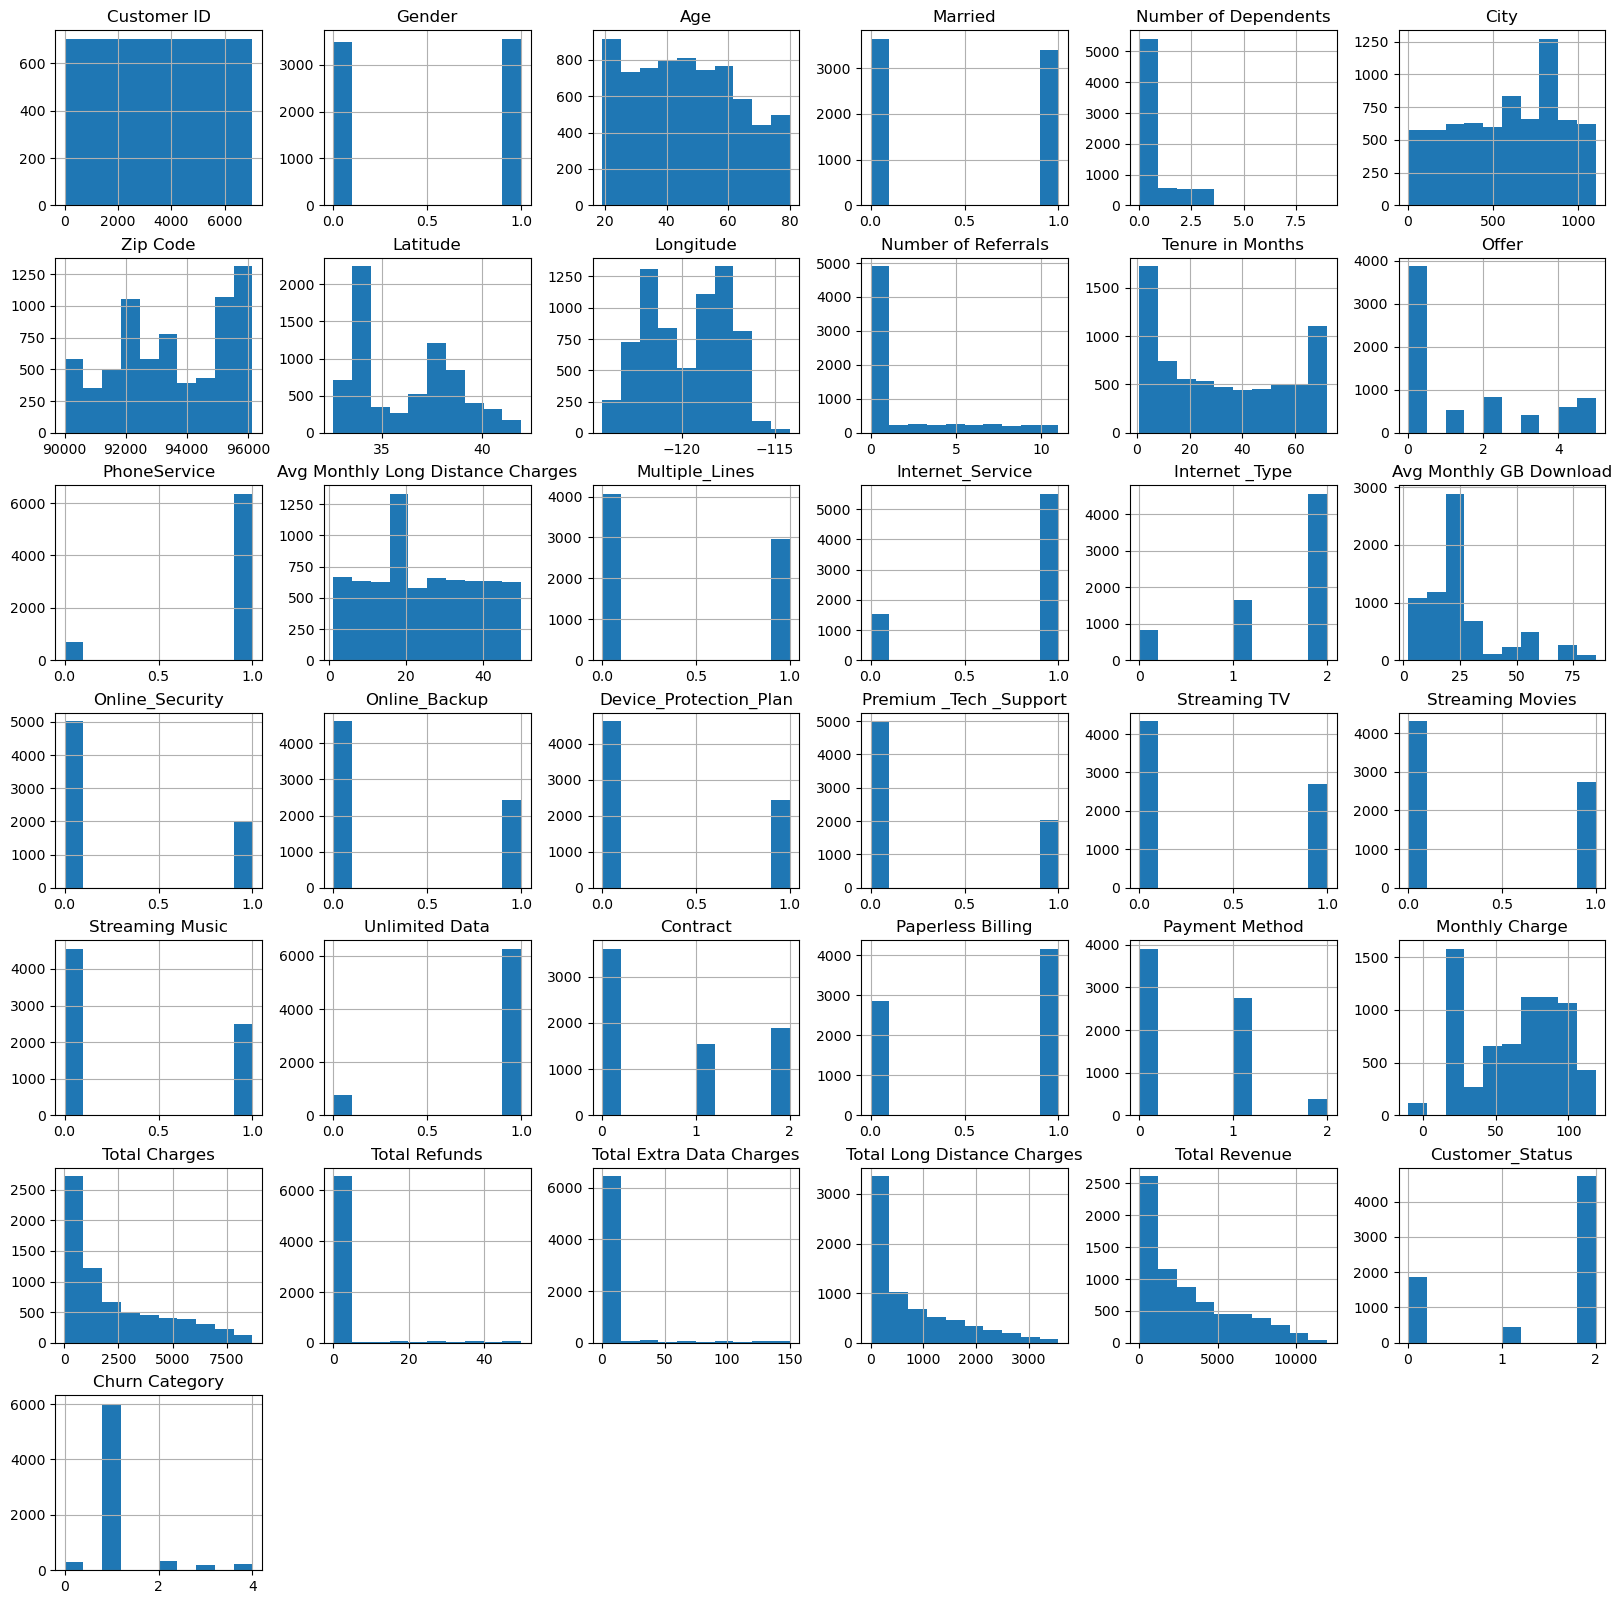

In [46]:
df.hist(figsize=(20,20))
plt.show()

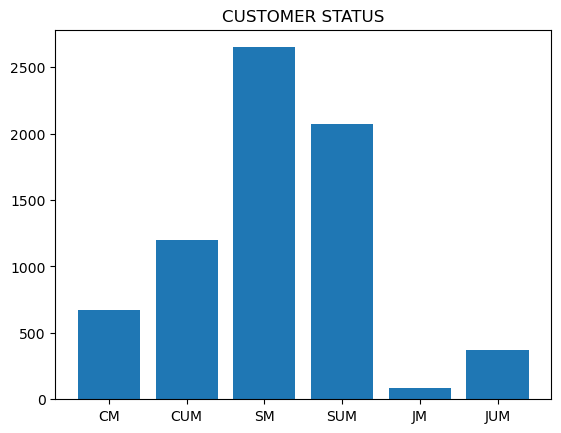

In [47]:
X=["CM",  "CUM", "SM","SUM","JM","JUM"]
Y=[count_curned_married,  count_curned_unmarried,  count_stayed_married,  count_stayed_unmarried,  count_joined_married,  count_joined_unmarried]
plt.bar(X,Y,width=0.8)
plt.title("CUSTOMER STATUS")
plt.show()

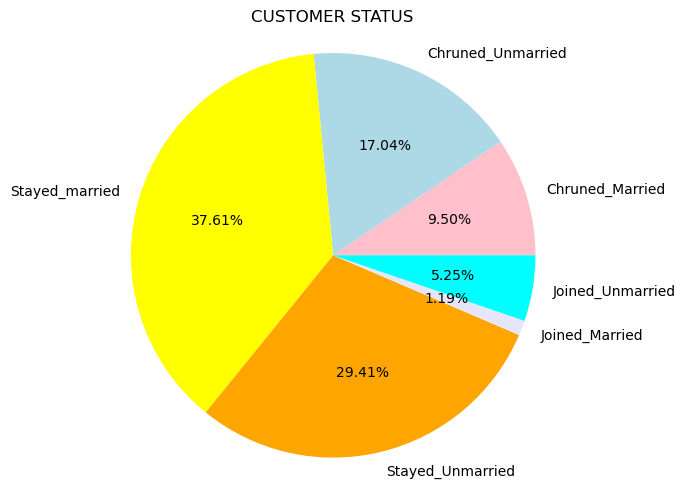

In [48]:
labels=["Chruned_Married","Chruned_Unmarried","Stayed_married","Stayed_Unmarried","Joined_Married","Joined_Unmarried"]
counts=[count_curned_married,count_curned_unmarried,count_stayed_married, count_stayed_unmarried,count_joined_married,count_joined_unmarried]
explode=(0,0,0,0,0,0)
color=['pink','lightblue','yellow','orange','lavender','cyan']
fig1,ax1=plt.subplots()
ax1.pie(counts,explode=explode,labels=labels,colors=color,autopct='%1.2f%%')
ax1.axis('equal')
plt.tight_layout()
plt.title("CUSTOMER STATUS")
plt.show()

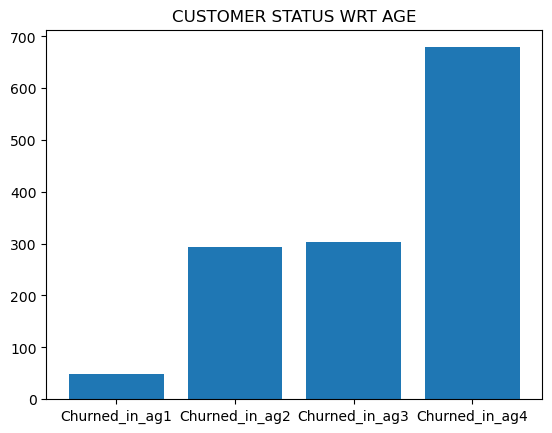

In [49]:
X=["Churned_in_ag1","Churned_in_ag2","Churned_in_ag3","Churned_in_ag4"]
Y=[ag1,ag2,ag3,ag4]
plt.bar(X,Y,width=0.8)
plt.title("CUSTOMER STATUS WRT AGE")
plt.show()

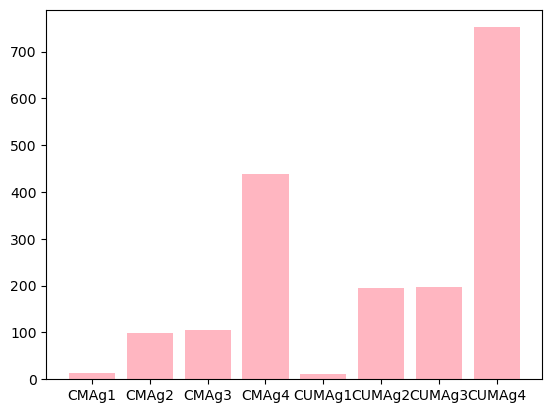

<Figure size 1000x1000 with 0 Axes>

In [50]:
X=["CMAg1",  "CMAg2", "CMAg3","CMAg4","CUMAg1","CUMAg2","CUMAg3","CUMAg4"]
Y=[count_curned1,count_curned2,count_curned3,count_curned4,count_curned5,count_curned6,count_curned7,count_curned8]
plt.bar(X,Y,width=0.8,color='lightpink')
plt.figure(figsize=(10,10))

plt.show()

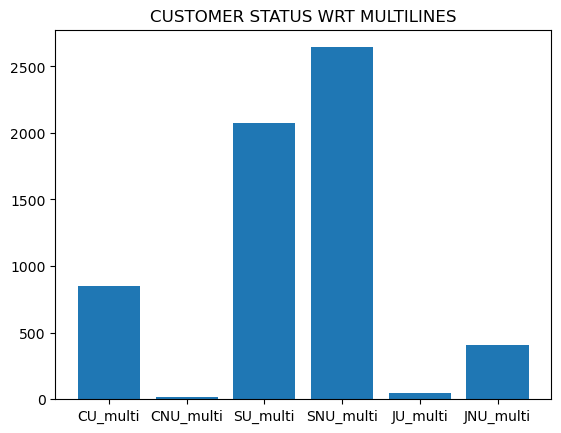

In [51]:
X=["CU_multi",  "CNU_multi", "SU_multi","SNU_multi","JU_multi","JNU_multi"]
Y=[count_curned,  count_curned1,count_stayed,count_stayed1,  count_joined,  count_joined1]
plt.bar(X,Y,width=0.8)
plt.title("CUSTOMER STATUS WRT MULTILINES")
plt.show()

# NLP

In [52]:
 df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer_Status,Churn Category,Churn_Reason
0,1118,0,46,0,0,1,93510,34.501452,-118.207862,0,...,1,44.05,202.15,0.0,0,54.95,257.10,2,1,NaN
1,2312,1,69,1,0,1,93510,34.501452,-118.207862,0,...,0,79.30,2414.55,0.0,0,305.95,2720.50,2,1,NaN
2,4359,1,34,0,0,2,92301,34.667815,-117.536183,0,...,1,45.80,436.20,0.0,0,154.50,590.70,2,1,NaN
3,6354,1,54,0,0,3,96006,41.171578,-120.913161,0,...,0,69.15,488.65,0.0,0,147.84,636.49,2,1,NaN
4,4967,1,53,1,0,4,91301,34.129058,-118.759788,0,...,0,108.65,6937.95,0.0,0,2722.20,9660.15,0,0,Attitude of support person


In [53]:
df1=df[['Age','Married' ,'Customer_Status' ,'Churn_Reason']]

In [54]:
df1

,Age,Married,Customer_Status,Churn_Reason
0,46,0,2,NaN
1,69,1,2,NaN
2,34,0,2,NaN
3,54,0,2,NaN
4,53,1,0,Attitude of support person
...,...,...,...,...
7038,31,1,1,NaN
7039,59,1,1,NaN
7040,61,1,2,NaN
7041,21,1,2,NaN


In [55]:
df2=df1[df1.Customer_Status==0]

In [56]:
df2.tail(5)

,Age,Married,Customer_Status,Churn_Reason
7027,67,1,0,Competitor had better devices
7028,32,1,0,Competitor offered more data
7029,64,1,0,Competitor had better devices
7034,55,1,0,Price too high
7037,29,1,0,Product dissatisfaction


In [57]:
df3=df2[(df2.Married==1)&(df2.Churn_Reason!="NaN")]
df3

,Age,Married,Customer_Status,Churn_Reason
4,53,1,0,Attitude of support person
195,37,1,0,Lack of self-service on Website
243,47,1,0,Long distance charges
373,69,1,0,Competitor offered higher download speeds
480,75,1,0,Competitor made better offer
...,...,...,...,...
7027,67,1,0,Competitor had better devices
7028,32,1,0,Competitor offered more data
7029,64,1,0,Competitor had better devices
7034,55,1,0,Price too high


In [58]:
#df1=df['Churn_Reason']

In [59]:
import nltk

In [60]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ridam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ridam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df2['Churn_Reason']=df2['Churn_Reason'].apply(remove_stopwords)

C:\Users\ridam\AppData\Local\Temp\ipykernel_10584\3716799792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Churn_Reason']=df2['Churn_Reason'].apply(remove_stopwords)


In [62]:
df3.head()

,Age,Married,Customer_Status,Churn_Reason
4,53,1,0,Attitude of support person
195,37,1,0,Lack of self-service on Website
243,47,1,0,Long distance charges
373,69,1,0,Competitor offered higher download speeds
480,75,1,0,Competitor made better offer


In [63]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df2['Churn_Reason']=df2['Churn_Reason'].apply(remove_stopwords)

nltk.download('averaged_perceptron_tagger')

def remove_pronouns(text):
    tokens = word_tokenize(text)
    tagged_words = nltk.pos_tag(tokens)
    pronouns = ['NNP']  # POS tags for pronouns
    filtered_tokens = [word for word, pos in tagged_words if pos not in pronouns]
    return ' '.join(filtered_tokens)

df2['Churn_Reason']=df2['Churn_Reason'].apply(remove_pronouns)

C:\Users\ridam\AppData\Local\Temp\ipykernel_10584\1569763931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Churn_Reason']=df2['Churn_Reason'].apply(remove_stopwords)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ridam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\ridam\AppData\Local\Temp\ipykernel_10584\1569763931.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Chu

In [64]:
df2.tail()

,Age,Married,Customer_Status,Churn_Reason
7027,67,1,0,better devices
7028,32,1,0,Competitor offered data
7029,64,1,0,better devices
7034,55,1,0,high
7037,29,1,0,Product dissatisfaction


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)

In [66]:
vectors=cv.fit_transform(df2['Churn_Reason'])


In [67]:
x=cv.get_feature_names()
print(x)

['affordable', 'better', 'charges', 'competitor', 'data', 'deceased', 'devices', 'dissatisfaction', 'distance', 'download', 'expertise', 'high', 'higher', 'know', 'limited', 'long', 'made', 'moved', 'offer', 'offered', 'online', 'person', 'phone', 'product', 'provider', 'range', 'reliability', 'self', 'service', 'services', 'speed', 'speeds', 'support', 'upload']


C:\Users\ridam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
from collections import Counter
text=' '.join(df2['Churn_Reason'])

In [69]:
words = text.split()

frequency=Counter(words)
tf=[]
for word,freq in frequency.items():
    print(word,"-",freq)
    tf.append(freq)
print(tf) 

support - 263
person - 220
service - 94
provider - 94
Competitor - 528
offered - 217
data - 156
higher - 100
download - 100
speeds - 100
expertise - 43
online - 31
made - 311
better - 624
offer - 311
Limited - 37
range - 37
services - 37
devices - 313
n't - 130
know - 130
reliability - 72
high - 78
Product - 77
dissatisfaction - 140
affordable - 30
download/upload - 30
speed - 30
phone - 12
Long - 64
distance - 64
charges - 103
self-service - 29
Moved - 46
Deceased - 6
[263, 220, 94, 94, 528, 217, 156, 100, 100, 100, 43, 31, 311, 624, 311, 37, 37, 37, 313, 130, 130, 72, 78, 77, 140, 30, 30, 30, 12, 64, 64, 103, 29, 46, 6]


In [70]:
df4 = df3["Churn_Reason"] 
unique_reasons = df3["Churn_Reason"].unique().tolist()
print("Unique reasons for churn:")
#print(unique_reasons)

lowercase_unique_reasons = [reason.lower() for reason in unique_reasons]
print(lowercase_unique_reasons)

print("\n",x)

Unique reasons for churn:
['attitude of support person', 'lack of self-service on website', 'long distance charges', 'competitor offered higher download speeds', 'competitor made better offer', 'extra data charges', 'attitude of service provider', 'competitor had better devices', 'competitor offered more data', 'price too high', 'poor expertise of online support', 'product dissatisfaction', 'poor expertise of phone support', 'network reliability', 'moved', "don't know", 'service dissatisfaction', 'lack of affordable download/upload speed', 'deceased', 'limited range of services']

 ['affordable', 'better', 'charges', 'competitor', 'data', 'deceased', 'devices', 'dissatisfaction', 'distance', 'download', 'expertise', 'high', 'higher', 'know', 'limited', 'long', 'made', 'moved', 'offer', 'offered', 'online', 'person', 'phone', 'product', 'provider', 'range', 'reliability', 'self', 'service', 'services', 'speed', 'speeds', 'support', 'upload']


In [71]:
y=[]
for i in range(len(x)):
    unique_words = x[i] 
    
    word_df = {word: [] for word in x}
    
    for word in x:

        for reason in lowercase_unique_reasons:
            if word in reason:
                word_df[word].append(1)
                
    word_count = {word: sum(counts) for word, counts in word_df.items()}
    
print("Word Document Frequency:")
for word, freq in word_count.items():
    z=f"{word}: {freq}"
    y.append(z)

print(y)

print(type(y))

Word Document Frequency:
['affordable: 1', 'better: 2', 'charges: 2', 'competitor: 4', 'data: 2', 'deceased: 1', 'devices: 1', 'dissatisfaction: 2', 'distance: 1', 'download: 2', 'expertise: 2', 'high: 2', 'higher: 1', 'know: 1', 'limited: 1', 'long: 1', 'made: 1', 'moved: 1', 'offer: 3', 'offered: 2', 'online: 1', 'person: 1', 'phone: 1', 'product: 1', 'provider: 1', 'range: 1', 'reliability: 1', 'self: 1', 'service: 4', 'services: 1', 'speed: 2', 'speeds: 1', 'support: 3', 'upload: 1']
<class 'list'>


In [72]:
f=[]
for word, freq in word_count.items():
    f.append(freq)
   # print(freq)    

In [73]:
import math

def calculate_idf(term, documents):
    num_documents = len(documents)
    term_appearance_count = sum(1 for doc in documents if term in doc)
    
    if term_appearance_count == 0:
        return 0
    
    return math.log(num_documents / term_appearance_count)
IDF=[]
for term in x:    
    idf = calculate_idf(term, lowercase_unique_reasons)
    print(f"IDF of '{term}': {idf}")
    IDF.append(idf)
#print(IDF)

IDF of 'affordable': 2.995732273553991
IDF of 'better': 2.302585092994046
IDF of 'charges': 2.302585092994046
IDF of 'competitor': 1.6094379124341003
IDF of 'data': 2.302585092994046
IDF of 'deceased': 2.995732273553991
IDF of 'devices': 2.995732273553991
IDF of 'dissatisfaction': 2.302585092994046
IDF of 'distance': 2.995732273553991
IDF of 'download': 2.302585092994046
IDF of 'expertise': 2.302585092994046
IDF of 'high': 2.302585092994046
IDF of 'higher': 2.995732273553991
IDF of 'know': 2.995732273553991
IDF of 'limited': 2.995732273553991
IDF of 'long': 2.995732273553991
IDF of 'made': 2.995732273553991
IDF of 'moved': 2.995732273553991
IDF of 'offer': 1.8971199848858813
IDF of 'offered': 2.302585092994046
IDF of 'online': 2.995732273553991
IDF of 'person': 2.995732273553991
IDF of 'phone': 2.995732273553991
IDF of 'product': 2.995732273553991
IDF of 'provider': 2.995732273553991
IDF of 'range': 2.995732273553991
IDF of 'reliability': 2.995732273553991
IDF of 'self': 2.995732273553

In [74]:
result=[]
for i,j in zip(tf,IDF):
    result.append(i*j)
#print(result)

for term,weight in zip(x,result):
        print(f"Weight of '{term}': {weight}")

Weight of 'affordable': 787.8775879446996
Weight of 'better': 506.5687204586901
Weight of 'charges': 216.4429987414403
Weight of 'competitor': 151.2871637688054
Weight of 'data': 1215.7649291008563
Weight of 'deceased': 650.073903361216
Weight of 'devices': 467.3342346744226
Weight of 'dissatisfaction': 230.25850929940458
Weight of 'distance': 299.57322735539907
Weight of 'download': 230.25850929940458
Weight of 'expertise': 99.01115899874398
Weight of 'high': 71.38013788281542
Weight of 'higher': 931.6727370752911
Weight of 'know': 1869.3369386976904
Weight of 'limited': 931.6727370752911
Weight of 'long': 110.84209412149767
Weight of 'made': 110.84209412149767
Weight of 'moved': 110.84209412149767
Weight of 'offer': 593.7985552692809
Weight of 'offered': 299.33606208922595
Weight of 'online': 389.4451955620188
Weight of 'person': 215.69272369588734
Weight of 'phone': 233.6671173372113
Weight of 'product': 230.67138506365728
Weight of 'provider': 419.40251829755874
Weight of 'range': 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

In [76]:
vectors=cv.fit_transform(df2['Churn_Reason'])

tfidf_transformer = TfidfTransformer()
tfidf_vectors = tfidf_transformer.fit_transform(vectors)
print("Weight of each reason:")
sum_of_weights = np.asarray(tfidf_vectors.sum(axis=1)).flatten()

reason_weights =[ (df2.iloc[idx]['Churn_Reason'],weight_sum) for idx, weight_sum in enumerate(sum_of_weights)]
sorted_reason_weights = sorted(reason_weights, key=lambda x: x[1], reverse=True)[:3]
for churn_reason, weight_sum in sorted_reason_weights:
    print(f"\n{churn_reason}: {weight_sum}")

Weight of each reason:

Competitor offered higher download speeds: 2.198711031088252

Competitor offered higher download speeds: 2.198711031088252

Competitor offered higher download speeds: 2.198711031088252


# Modeling

In [77]:
df5=df[['Age','Married','Number of Dependents','Zip Code','Tenure in Months','PhoneService','Offer','Avg Monthly Long Distance Charges','Multiple_Lines','Internet_Service','Internet _Type','Avg Monthly GB Download','Online_Security','Online_Backup','Device_Protection_Plan','Premium _Tech _Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Payment Method','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue','Customer_Status']]

In [78]:
df5.head(5)

,Age,Married,Number of Dependents,Zip Code,Tenure in Months,PhoneService,Offer,Avg Monthly Long Distance Charges,Multiple_Lines,Internet_Service,...,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer_Status
0,46,0,0,93510,5,1,0,10.99,0,1,...,1,0,1,44.05,202.15,0.0,0,54.95,257.10,2
1,69,1,0,93510,29,1,0,10.55,1,1,...,1,0,0,79.30,2414.55,0.0,0,305.95,2720.50,2
2,34,0,0,92301,10,1,0,15.45,0,1,...,1,0,1,45.80,436.20,0.0,0,154.50,590.70,2
3,54,0,0,96006,7,1,0,21.12,0,1,...,1,0,0,69.15,488.65,0.0,0,147.84,636.49,2
4,53,1,0,91301,65,1,0,41.88,1,1,...,1,2,0,108.65,6937.95,0.0,0,2722.20,9660.15,0


In [79]:
target_column = ['Customer_Status']
predictors = list(set(list(df5.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()
df[predictors].head()


,Streaming Movies,Tenure in Months,Device_Protection_Plan,Monthly Charge,Payment Method,Multiple_Lines,Zip Code,Internet_Service,Age,Number of Dependents,...,Online_Backup,Premium _Tech _Support,Unlimited Data,Total Extra Data Charges,Total Long Distance Charges,Internet _Type,Total Refunds,Online_Security,Streaming Music,Total Revenue
0,0.0,0.069444,0.0,0.370947,0.5,0.0,0.972543,1.0,0.5750,0.0,...,0.0,0.0,1.0,0.0,0.015415,0.5,0.0,0.0,0.0,0.021462
1,0.0,0.402778,0.0,0.667789,0.0,1.0,0.972543,1.0,0.8625,0.0,...,0.0,1.0,1.0,0.0,0.085827,1.0,0.0,0.0,0.0,0.227099
2,0.0,0.138889,0.0,0.385684,0.5,0.0,0.959969,1.0,0.4250,0.0,...,0.0,0.0,1.0,0.0,0.043341,0.0,0.0,0.0,0.0,0.049310
3,0.0,0.097222,0.0,0.582316,0.0,0.0,0.998502,1.0,0.6750,0.0,...,0.0,0.0,1.0,0.0,0.041473,1.0,0.0,0.0,0.0,0.053132
4,1.0,0.902778,1.0,0.914947,0.0,1.0,0.949568,1.0,0.6625,0.0,...,0.0,1.0,1.0,0.0,0.763650,1.0,0.0,1.0,1.0,0.806401


In [80]:
print(predictors)
print(len(predictors))

['Streaming Movies', 'Tenure in Months', 'Device_Protection_Plan', 'Monthly Charge', 'Payment Method', 'Multiple_Lines', 'Zip Code', 'Internet_Service', 'Age', 'Number of Dependents', 'Offer', 'Contract', 'PhoneService', 'Streaming TV', 'Married', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Online_Backup', 'Premium _Tech _Support', 'Unlimited Data', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Internet _Type', 'Total Refunds', 'Online_Security', 'Streaming Music', 'Total Revenue']
28


In [81]:
from sklearn.model_selection import train_test_split
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(4930, 28)
(2113, 28)


In [86]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(28, 28), activation='logistic', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
#print(predict_test)


C:\Users\ridam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ridam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[ 783   87  434]
 [ 111  204    3]
 [ 159    0 3149]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      1304
           1       0.70      0.64      0.67       318
           2       0.88      0.95      0.91      3308

    accuracy                           0.84      4930
   macro avg       0.77      0.73      0.75      4930
weighted avg       0.83      0.84      0.83      4930



In [84]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, predict_train)
print("Accuracy:", accuracy)


Accuracy: 0.8389452332657201


In [85]:
new_input = np.array([[46,0,0,93510,5,1,0,10.99,0,1,1,29,0,0,0,0,0,0,0,1,0,1,44.05,202.15,0.0,0,54.95,257.10]]) 
predicted_class = mlp.predict(new_input)
print(predicted_class)

[0]
